In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.shape

(1025, 14)

In [5]:
x=data.drop(columns=["target"])

In [6]:
y=data["target"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [8]:
x_train.shape

(820, 13)

In [9]:
x_test.shape

(205, 13)

here the stacking will have 3 models - random forest classifier, knn and gradient boost classifier. The meta model here is the Logistic Regression

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier

In [11]:
from sklearn.ensemble import StackingClassifier

In [12]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [13]:
model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [14]:
model.fit(x_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [15]:
y_perd=model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_perd)

1.0

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf=RandomForestClassifier(oob_score=True)

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [22]:
rf.score(x_train,y_train)

1.0

In [23]:
rf.oob_score_

0.9951219512195122

In [24]:
y_pred=rf.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred)

1.0

In [26]:
from sklearn.tree import  DecisionTreeClassifier

In [28]:
from sklearn.datasets import  make_classification
x,y=make_classification(n_samples=5,n_classes=2, n_features=2,n_informative=2,\
    n_redundant=0,random_state=0)

In [29]:
x

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [30]:
y

array([0, 1, 0, 1, 0])

In [31]:
dtc=DecisionTreeClassifier()

In [32]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [33]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

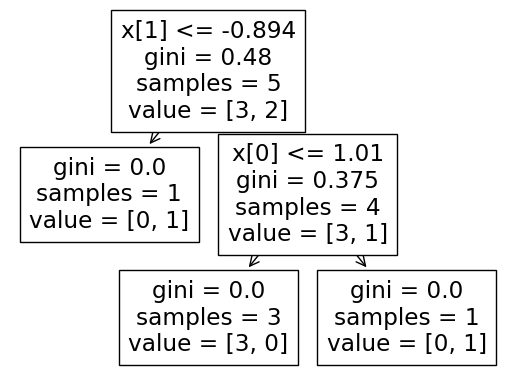

In [34]:
plot_tree(dtc)

In [35]:
dtc.feature_importances_

array([0.625, 0.375])

In [36]:
rfc=RandomForestClassifier(n_estimators=2)

In [37]:
rfc.fit(x,y)

RandomForestClassifier(n_estimators=2)

In [38]:
rfc.feature_importances_

array([0.8125, 0.1875])

In [39]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1607749919),
 DecisionTreeClassifier(max_features='sqrt', random_state=1509228110)]

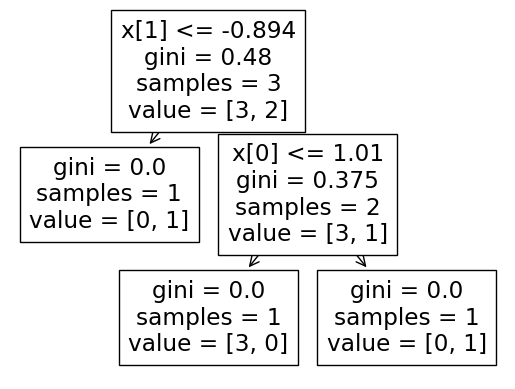

In [41]:
for i in range(0,2):
    plot_tree(rfc.estimators_[i])